In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
color_dict = {"Norway": "#2B314D", "Denmark": "#A54836", "Sweden": "#5375D4", }
xy_ticklabel_color, grand_totals_color, grid_color, datalabels_color ='#757C85',"#101628", "#C8C9C9", "w"

data = {
    "year": [2004, 2022, 2004, 2022, 2004, 2022],
    "countries" : ["Sweden", "Sweden", "Denmark", "Denmark", "Norway", "Norway"],
    "sites": [13,15,4,10,5,8]
}

df= pd.DataFrame(data)  #df is the dataframe with data now
df

,year,countries,sites
0,2004,Sweden,13
1,2022,Sweden,15
2,2004,Denmark,4
3,2022,Denmark,10
4,2004,Norway,5
5,2022,Norway,8


In [103]:
df = df.sort_values([ 'sites'], ascending=True ).reset_index(drop=True)
df['year_lbl'] ="'"+df['year'].astype(str).str[-2:].astype(str)
#map the colors of a dict to a dataframe
df['color']= df.countries.map(color_dict)
df

,year,countries,sites,year_lbl,color
0,2004,Denmark,4,'04,#A54836
1,2004,Norway,5,'04,#2B314D
2,2022,Norway,8,'22,#2B314D
3,2022,Denmark,10,'22,#A54836
4,2004,Sweden,13,'04,#5375D4
5,2022,Sweden,15,'22,#5375D4


In [104]:
nr_bars = 20
bar_height = 0.5 #height of the bars
offset = 2 # offset of the bars

In [105]:
#divide 180 degrees into 20 bars
rad_x = np.deg2rad(np.linspace(0,180,nr_bars, endpoint= False))
#add the angle for each site to the dataframe
df['angles'] = rad_x[df.sites]
#get the radius for each circle
r= [2+bar_height/3,2+bar_height/3*2,2+bar_height/3*2,2+bar_height/3,2+bar_height/2,2+bar_height/2]
#add the radius to the dataframe
df['radius'] = r

In [106]:
year_labels= df.year_lbl
colors = df.color
legend = df.countries
theta = df.angles
radius = df.radius
sites = df.sites

#arch for the arrows
connectionstyle = ["arc3,rad=0.24","arc3,rad=0.15","arc3,rad=0.15"]

#slice angles and radius by country
angles_bycountry = df.groupby('countries')['angles'].apply(lambda x: x.values) 
r_bycountry = df.groupby('countries')['radius'].apply(lambda x: x.values)

#add axis labels
axis_labels = list(range(0,25,5))
theta_labels = np.array([rad_x[i] for i in list(range(0,20,5))])
label_pos = np.append(theta_labels,np.pi) #add the last coordinate of the label

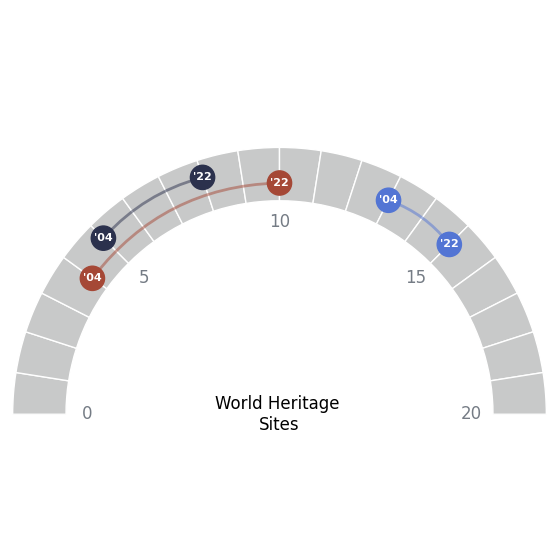

In [107]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(polar=True))

ax.set_theta_zero_location("W")  # theta=0 at the top
ax.set_theta_direction(-1)  # theta increasing clockwise
ax.set_thetamax(180) # stop at 180 degrees


ax.bar(rad_x, width=np.deg2rad(180/nr_bars), height=bar_height,  bottom=offset,
       linewidth=1, edgecolor="white",color=grid_color,
        align="edge")
ax.scatter(theta, radius, color=colors, s = 305, zorder=2)

#add arcs
for angle,r, color,connectionstyle in zip(angles_bycountry,r_bycountry, colors.unique(),connectionstyle):
        ax.annotate("", xy=(angle[0],r[0]), xytext=(angle[1],r[1]), zorder = 1,
                arrowprops=dict(arrowstyle='-', connectionstyle = connectionstyle, 
                        color = color, alpha= 0.5, linewidth=2, linestyle='-', antialiased=True))

  
#bubble data labels
for t, r,lb in zip(theta, radius, year_labels):
    ax.annotate(lb, xy=(t,r), color ="w", size= 8, weight= "bold", ha="center", va="center")

# axis labels
for loc, val, r in zip( label_pos, axis_labels, radius):
    ax.annotate(val, xy=(loc, offset-0.2), size= 12, va= 'center', ha= 'center', color=xy_ticklabel_color)
    
ax.text(0.5, 0, "World Heritage \nSites", size=12, ha="center", va="center")

ax.set_axis_off()